In [22]:
library(tidyverse)
library(ggplot2)
library(patchwork)
source("helper.R")

In [2]:
sinfo_path = "../../output/sims_info.tsv"
sinfoh_path = "../../output/header_sims_info.tsv"

In [3]:
win_size = 1000000
win_len = -1
padding = 0
rescf = 1

In [4]:
sims_path = "../../output/sims_results/"

In [5]:
sinfo = read.table(sinfo_path, sep="\t")
h = read.table(sinfoh_path, sep="\t", header=TRUE)
colnames(sinfo) = colnames(h)

In [6]:
diff_cols = c("delrate","delcoef","posrate","poscoef","mu", "rescf", "win_len", "padding", "chr")
#diff_cols = c("delrate","delcoef","posrate","poscoef","mu", "poscoefdecayeps", "rescf", "win_len", "padding", "chr")

In [7]:
wsize_str = paste0("win-size_",as.integer(win_size))

In [8]:
sims_folders = list.files(sims_path)[grep(wsize_str, list.files(sims_path))]

In [9]:
sims_folders[1]

[1] "sup-rand-id_0ASPD1FD6L57DMLSWJ_rep_0_win-size_1000000_sample-size_10"

In [10]:
simresults = as.data.frame(do.call(rbind, lapply(X = sims_folders, function(x) unlist(meta_from_fname(x,prop="0.4",suffix="$")))), stringsAsFactors =FALSE)

In [11]:
simresults$folderpath = sims_folders

In [12]:
tmp = unique(sinfo[sinfo$sup_rand_id %in% simresults$sup_rand_id,c(diff_cols,"sup_rand_id")])

In [13]:
simresults = left_join(simresults, tmp)

Joining, by = "sup_rand_id"



In [14]:
simresults = simresults[simresults$win_len==win_len & simresults$padding == padding & simresults$rescf==1,]

In [15]:
simresults$selregime = ifelse(simresults$posrate<1e-16,ifelse(simresults$delrate<1e-16, "neutral", "del_only"), ifelse(simresults$delrate<1e-16, "pos_only", "both"))

In [16]:
list.files(paste0(sims_path,simresults[10,]$folderpath))

[1] "cor-pidxy-dT_sup-rand-id_N4JCLYPOL45Q7DV2Y1_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4.rds"               
 [2] "cor-pidxy-exon-byrec_sup-rand-id_N4JCLYPOL45Q7DV2Y1_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4.tsv"       
 [3] "cor-pidxy-exon_sup-rand-id_N4JCLYPOL45Q7DV2Y1_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4.tsv"             
 [4] "cor-pidxy-pcons-byrec_sup-rand-id_N4JCLYPOL45Q7DV2Y1_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4.tsv"      
 [5] "cor-pidxy-pcons_sup-rand-id_N4JCLYPOL45Q7DV2Y1_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4.tsv"            
 [6] "cor-pidxy-pidxy_sup-rand-id_N4JCLYPOL45Q7DV2Y1_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4.tsv"            
 [7] "cor-pidxy-rec-rate-byrec_sup-rand-id_N4JCLYPOL45Q7DV2Y1_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4.tsv"   
 [8] "cor-pidxy-rec-rate_sup-rand-id_N4JCLYPOL45Q7DV2Y1_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4.tsv"         
 [9] "cor-pin-pin_sup-rand-id_N4JCLYPOL45Q7DV2Y1_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4.tsv"                
[10] "figs"                                                                                                             
[11] "long-cor_sup-rand-id_N4JCLYPOL45Q7DV2Y1_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4.rds"                   
[12] "piN-withmetadata_sup-rand-id_N4JCLYPOL45Q7DV2Y1_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4.tsv"           
[13] "pidxy-filtered-withmetadata_sup-rand-id_N4JCLYPOL45Q7DV2Y1_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4.tsv"

In [17]:
tmp = simresults[c(10,15,9,6,12,2),]

plots = apply(tmp,1,
              function(x) readRDS(paste0(sims_path,x["folderpath"],
                                         "/cor-pidxy-dT_",x["desc"],".rds"))+ggtitle(x["desc"]))


In [18]:
tmp

,win_size,sup_rand_id,rep,sample_size,spaced_desc,desc,prop,is_ga_data,folderpath,delrate,delcoef,posrate,poscoef,mu,rescf,win_len,padding,chr,selregime
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<chr>
57,1000000,N4JCLYPOL45Q7DV2Y1,0,10,sup-rand-id=N4JCLYPOL45Q7DV2Y1 rep=0 win-size=1000000 sample-size=10 prop-acc=0.4,sup-rand-id_N4JCLYPOL45Q7DV2Y1_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,0.4,FALSE,sup-rand-id_N4JCLYPOL45Q7DV2Y1_rep_0_win-size_1000000_sample-size_10,0.0e+00,0.000,1e-10,0.01,1.0000e-10,1,-1,0,chr12,pos_only
70,1000000,RES6S2QYGOLJKSE9XH,0,10,sup-rand-id=RES6S2QYGOLJKSE9XH rep=0 win-size=1000000 sample-size=10 prop-acc=0.4,sup-rand-id_RES6S2QYGOLJKSE9XH_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,0.4,FALSE,sup-rand-id_RES6S2QYGOLJKSE9XH_rep_0_win-size_1000000_sample-size_10,2.0e-09,-0.015,1e-10,0.01,2.1000e-09,1,-1,0,chr12,both
46,1000000,HC27BSIEQBYZJHHUQV,0,10,sup-rand-id=HC27BSIEQBYZJHHUQV rep=0 win-size=1000000 sample-size=10 prop-acc=0.4,sup-rand-id_HC27BSIEQBYZJHHUQV_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,0.4,FALSE,sup-rand-id_HC27BSIEQBYZJHHUQV_rep_0_win-size_1000000_sample-size_10,2.0e-09,-0.030,1e-11,0.01,2.0100e-09,1,-1,0,chr12,both
25,1000000,9WZ486SOY2Q604EOMM,0,10,sup-rand-id=9WZ486SOY2Q604EOMM rep=0 win-size=1000000 sample-size=10 prop-acc=0.4,sup-rand-id_9WZ486SOY2Q604EOMM_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,0.4,FALSE,sup-rand-id_9WZ486SOY2Q604EOMM_rep_0_win-size_1000000_sample-size_10,1.2e-08,-0.030,1e-12,0.01,1.2001e-08,1,-1,0,chr12,both
65,1000000,PWL6X0GLJ41YTXGYAK,0,10,sup-rand-id=PWL6X0GLJ41YTXGYAK rep=0 win-size=1000000 sample-size=10 prop-acc=0.4,sup-rand-id_PWL6X0GLJ41YTXGYAK_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,0.4,FALSE,sup-rand-id_PWL6X0GLJ41YTXGYAK_rep_0_win-size_1000000_sample-size_10,0.0e+00,0.000,1e-11,0.01,1.0000e-11,1,-1,0,chr12,pos_only
7,1000000,4FL6KFJXU6APHC2GA6,0,10,sup-rand-id=4FL6KFJXU6APHC2GA6 rep=0 win-size=1000000 sample-size=10 prop-acc=0.4,sup-rand-id_4FL6KFJXU6APHC2GA6_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,0.4,FALSE,sup-rand-id_4FL6KFJXU6APHC2GA6_rep_0_win-size_1000000_sample-size_10,1.2e-08,-0.030,1e-11,0.01,1.2010e-08,1,-1,0,chr12,both


In [19]:
ordered = c("neutral", "del_only", "pos_only", "both")

In [20]:
classes = unique(tmp$selregime)
tmp$selregime = factor(tmp$selregime, levels=classes[order(match(classes,ordered))])

In [23]:
combined = list()
for (class in classes[order(match(classes,ordered))]) {
    slice = tmp[tmp$selregime==class,]
    slice_plots = plots[tmp$selregime==class]
    a = wrap_plots(slice_plots, nrow=1, guides='collect')
    combined = c(combined,list(a))
}

In [24]:
#TODO: remove unnecessary stuff from descriptions
#TODO: figure out how to programatically create design
#TODO: sort data.frame before applying to get the plots

In [25]:
tab=table(tmp$selregime)

In [26]:
design=""
counter = 1
for (x in tab) {
    #print(rep("#", max(tab)-x))
    if (design != "") design = paste0(design,"\n")
    uni = 1:x
    print(LETTERS[counter+uni-1])
    print(rep("#", max(tab)-x))
    add = paste0(paste0(LETTERS[counter+uni-1],collapse=""), paste0(rep("#", max(tab)-x),collapse=""), collapse="")
    print(design)
    print(add)
    design = paste0(design,add)
    print(design)
    counter = max(uni)+1
}

[1] "A" "B"
[1] "#" "#"
[1] ""
[1] "AB##"
[1] "AB##"
[1] "C" "D" "E" "F"
character(0)
[1] "AB##\n"
[1] "CDEF"
[1] "AB##\nCDEF"


Warning message:
"Removed 164 rows containing missing values (geom_point)."
Warning message:
"Removed 126 rows containing missing values (geom_point)."


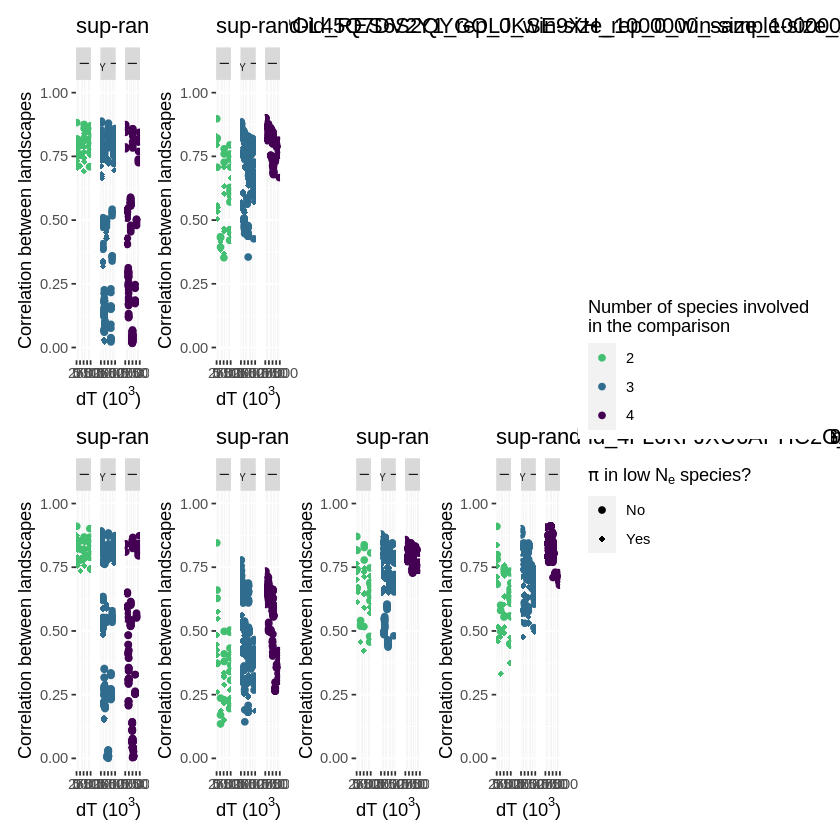

In [27]:

wrap_plots(plots, nrow=length(classes), design=design, guides="collect")

In [ ]:
plots[[2]]

In [ ]:
plots

In [ ]:
p = readRDS(paste0(sims_path,row$folderpath,"/cor-pidxy-dT_",row$desc,".rds"))

In [ ]:
p